## Исследование для планирования рекламной кампании

### Описание проекта
Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.

#### Описание данных
```Name``` — название игры  
```Platform``` — платформа  
```Year_of_Release``` — год выпуска  
```Genre``` — жанр игры  
```NA_sales``` — продажи в Северной Америке (миллионы проданных копий)  
```EU_sales``` — продажи в Европе (миллионы проданных копий)  
```JP_sales``` — продажи в Японии (миллионы проданных копий)  
```Other_sales``` — продажи в других странах (миллионы проданных копий)  
```Critic_Score``` — оценка критиков (максимум 100)  
```User_Score``` — оценка пользователей (максимум 10)  
```Rating``` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 

### Оглавление
1 <a href = '#open'>Открытие и изучение файла</a>  
2 <a href = '#preparation'>Подготовка данных</a>  
3 <a href = '#research'>Проведение исследовательского анализа</a>  
4 <a href = '#portreit'>Портрет пользователя каждого региона</a>  
5 <a href = '#hypotheses'>Проверка гипотез</a>  
6 <a href = '#conclusion'>Общий вывод</a>  

### Шаг 1. Откройте файл с данными и изучите общую информацию
<a  id = 'open'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Вывод
В данных присутствуют пропуски. Две строки не содержат жанра и имени, в 269 строках пропущен год релиза. Это похоже на техническую ошибку. Множество пропусков в столбцах с оценками и рейтингом. Возможно, что некоторые игры еще не оценили критики и пользователи (игра не вышла). Колонки `Year_of_Release` и `Critic_Score` имеют неверные типы. Подготовим данные для дальнейшего анализа.

### Шаг 2. Подготовьте данные
<a id = 'preparation'></a>

Приведем названия столбцов и значения строковых столбцов к нижнему регистру для удобства обращения с ними

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()

In [7]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Строки с пропущенным именем содержат пропуски и в жанре, рейтингах и оценках. Таких строк всего две, восстановить значения мы не можем, удалим строки.

In [8]:
data = data.query('name.notna()')

In [9]:
data.query('year_of_release.isna()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [10]:
data.query('name=="madden nfl 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,madden nfl 2004,xb,2003.0,sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,madden nfl 2004,gc,2003.0,sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,madden nfl 2004,gba,2003.0,sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Игра выходит в один год на разных платформах. Попробуем восстановить пропущенные значения по имеющимя данным в той же игре.  
Создадим датафрейм с медианой и средним значением года релиза, если значения одинаковы, то заполненные года релиза одинаковы для все платформ, можем заполнить пропущенные значения. Создадим словарь с названиями игр и медианой.

In [11]:
df_year_release = data.groupby('name')['year_of_release'].agg(['mean','median']).reset_index()
df_year_release['year'] = df_year_release['mean']-df_year_release['median']
df_year_release = df_year_release.query('year==0')
df_year_release['mean'] = df_year_release['mean'].astype(int)

In [12]:
dict_year_release = df_year_release[['name','mean']].set_index('name').T.to_dict('records')[0]

In [13]:
def year(row):
    if row['name'] is np.nan:
        if row['name'] in dict_year_release:
            return int(dict_year_release[row['name']])
    else:
        return row['year_of_release']

In [14]:
data['year_of_release'] = data.apply(year, axis = 1)

Приведем столбцы года и оценки критиков по 100б к целочисленному типу

In [15]:
data['critic_score'] = data['critic_score'].astype('Int64')
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [16]:
len(data[data['year_of_release'].isna()])/len(data)

0.016095255190570215

Осталось около 2% пустых значений в столбце года релиза, удалим их

In [17]:
data = data.query('year_of_release.notna()')

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
data['all_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

Обработаем значения `tbd` оценки пользователей. Такое значение говорит нам о том, что игра еще не оценена. Заменим на NaN, отсутствие значени еозначает то же, в двльнейшем так будет удобнее работать, приведя колонку к типу float

In [20]:
data['user_score'] = data['user_score'].where(data['user_score']!= 'tbd', np.nan).astype(float)

#### Вывод
Мы привели столбцы и строковые значения к нижнему регистру для удобства работы с ними. Преобразовали данные в нужные типы. 
Столбец года релиза и оценки критиков привели к целочисленному типу. Мы заменили значения не определенных рейтингов пользователей на NaN и привели столбец к типу float.   
Мы удалили строки с отсутствующим названием и жанром.   
Мы обработали пропуски года релиза игр. Ошибка похожа на техническую, не выгружены годы релиза у большого числа игр, такие пропуски мы обработали, находим годы релиза у той же игры на других платформах.  
Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец. Это значения будет полезно для дальнейшего анализа.

### Шаг 3. Проведите исследовательский анализ данных
<a id = 'research'></a>

Посмотрим число выпущенных игр в разные годы

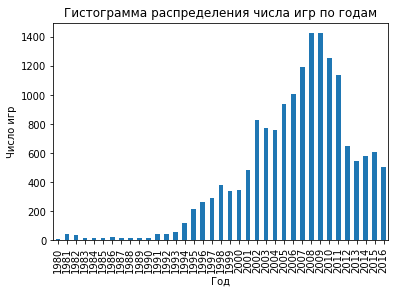

In [21]:
data.groupby('year_of_release').count()['name'].plot(kind = 'bar')
plt.title('Гистограмма распределения числа игр по годам')
plt.xlabel('Год')
plt.ylabel('Число игр')
plt.show()

Посмотрим, как менялись продажи по платформам.  
Выберем топ платформ по общему числу продаж игр

In [22]:
data.groupby('platform')['all_sales'].sum().sort_values(ascending = False).head(10)

platform
ps2     1233.56
x360     961.24
ps3      931.34
wii      891.18
ds       802.78
ps       727.58
ps4      314.14
gba      312.88
psp      289.53
3ds      257.81
Name: all_sales, dtype: float64

In [23]:
top_platform_index = data.groupby('platform').sum().sort_values('all_sales', ascending = False).head(10).index

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

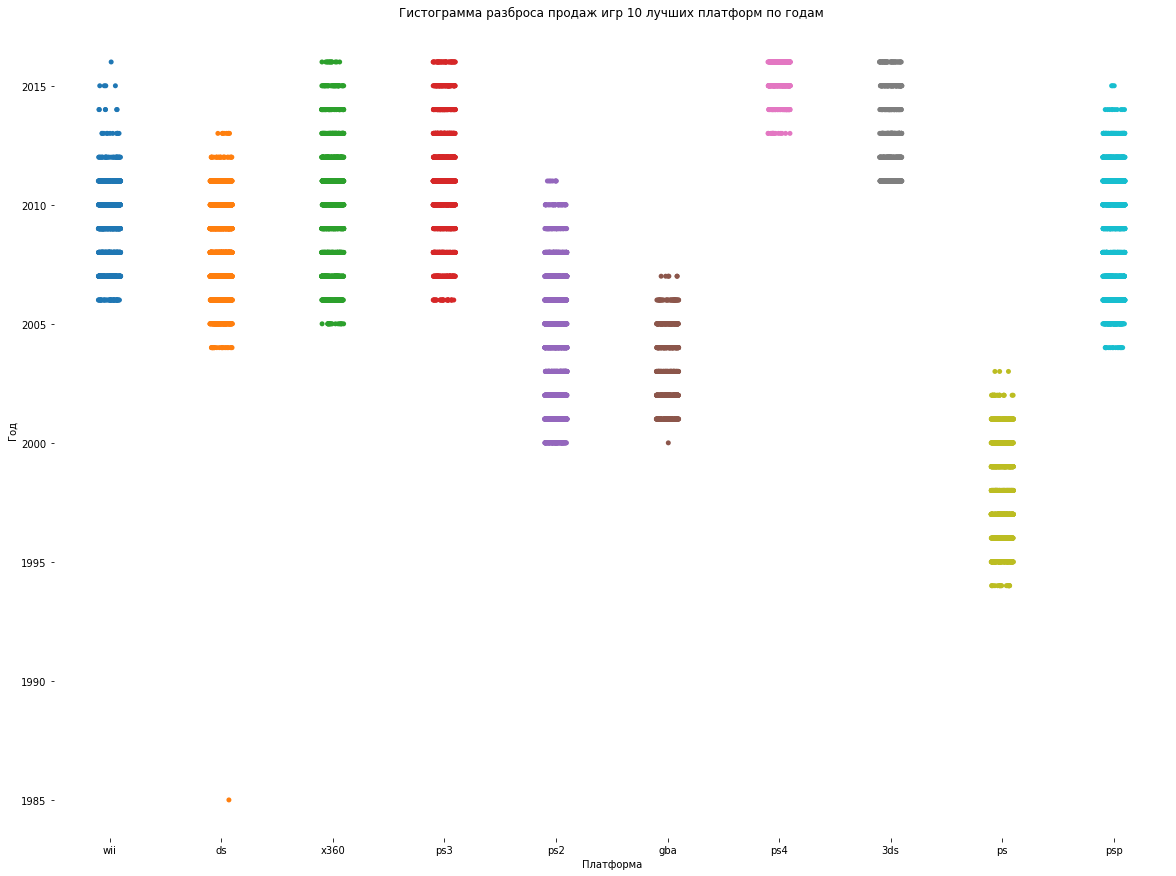

In [24]:
f, ax = plt.subplots(figsize=(20,15))
sns.despine(bottom=True, left=True)
sns.stripplot(x="platform", y="year_of_release",
              data=data.query('platform in @top_platform_index'), 
              dodge=True, alpha=1, zorder=10)
plt.title('Гистограмма разброса продаж игр 10 лучших платформ по годам')
plt.xlabel('Платформа')
plt.ylabel('Год')
plt.show()

Из приведенных выше графиков выидим, что число игр резко росло с 2000 года и 2012 мы наблюдаем, что чило игр сократилось и остается на одном уровне. Игры стали сложнее, их создают крупные разработчики, поэтому число снизилось. Мы рассмотрели суммарные продажи числа копий на разных платформах по годам и выяснили, что срок жизни платформ примерно равен у всех и составляет около 10 лет.  
Можем выделить актуальный период для исследования - данные после 2011 года.

In [25]:
data = data.query('platform!="ds" or year_of_release!=1985')

In [26]:
for pltf in top_platform_index:
    data_pltf = data.query('platform==@pltf')['year_of_release']
    if data_pltf.max() == 2016:
        m = 'relevant'
    else:
        m = 'not relevant'
    print(pltf, data_pltf.max() - data_pltf.min(), m)

ps2 11 not relevant
x360 11 relevant
ps3 10 relevant
wii 10 relevant
ds 9 not relevant
ps 9 not relevant
ps4 3 relevant
gba 7 not relevant
psp 11 not relevant
3ds 5 relevant


Удален выброс платформы ds и посчитана продолжительность существования платформ. x360 все еще продает много игр и существует 11 лет, а вот актуальность wii подходит к концу. Из крупных платформ x360, ps3, ps4, 3ds актуальны и развиваются.

In [27]:
data_actual = data.query('year_of_release>2011')

Найдем платформы - лидеры продаж

In [28]:
data_platform_dynamix = data_actual.groupby(['platform','year_of_release']).sum().reset_index()

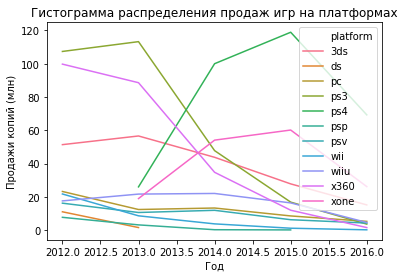

In [29]:
sns.lineplot(data = data_platform_dynamix, x = 'year_of_release', y ='all_sales', hue = 'platform')
plt.title('Гистограмма распределения продаж игр на платформах')
plt.xlabel('Год')
plt.ylabel('Продажи копий (млн)')
plt.show()

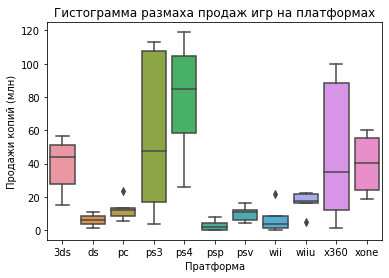

In [30]:
sns.boxplot(data = data_platform_dynamix, x = 'platform', y ='all_sales')
plt.title('Гистограмма размаха продаж игр на платформах')
plt.xlabel('Пратформа')
plt.ylabel('Продажи копий (млн)')
plt.show()

Видим, что сейчас продажи платформ падают. По продажам лидируют ps2(1233.56 млн), x360(961.24млн), ps3(931.34 млн). 
Можем выделить наиболее перспективные платформы. Это ps4 с наибольшим числом продаж за последние годы, высокой медианой, ps3 остается актуальной, она имеет большое число значений в 3 квартиле, платформа 3ds со все еще большим числом продаж за посление годы.

Разница в показателях между платформами достигается за счет эксклюзивности игр на платформах. Кроме того, мы можем явно выделить два типа платформ: игровые приставки(ps3, ps4, x360, xone) и портативные игровые системы (3ds, ds, psp, wii, psv, wiiu). Портативные системы становятся не актуальны.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [31]:
def plot_corr_platform(df):
    sns.scatterplot(data = df, x = 'critic_score', y = 'all_sales')
    plt.title('Диаграмма рассеяния продаж от оценки критиков')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи копий (млн)')
    plt.show()
    sns.scatterplot(data = df, x = 'user_score', y = 'all_sales')
    plt.title('Диаграмма рассеяния продаж от оценки пользователей')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи копий (млн)')
    plt.show()

In [32]:
ps3 = data.query('platform == "ps3"')
ps4 = data.query('platform == "ps4"')
thrds = data.query('platform == "3ds"')
xone = data.query('platform == "xone"')

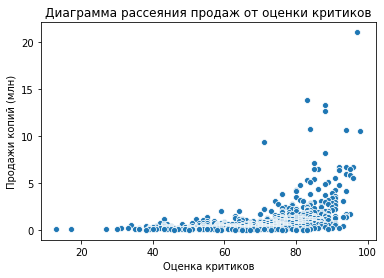

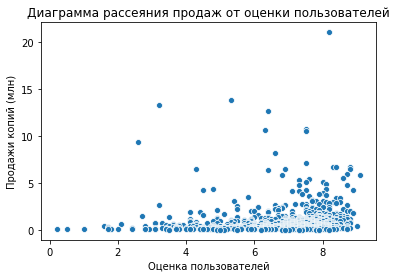

In [33]:
plot_corr_platform(ps3)

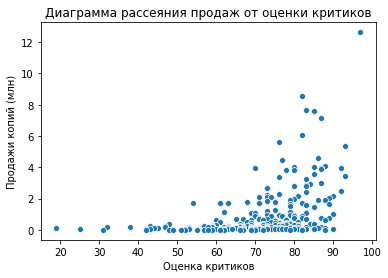

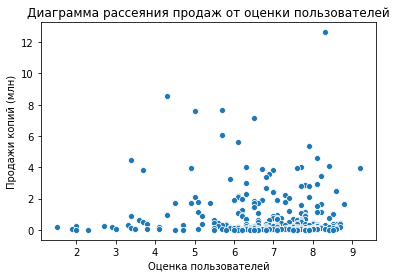

In [34]:
plot_corr_platform(ps4)

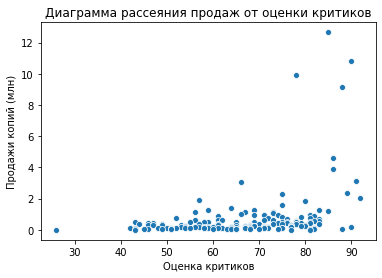

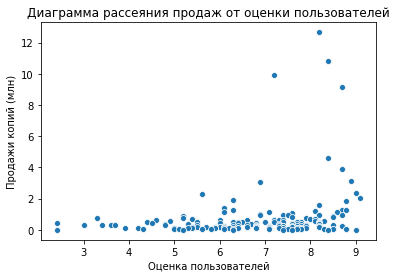

In [35]:
plot_corr_platform(thrds)

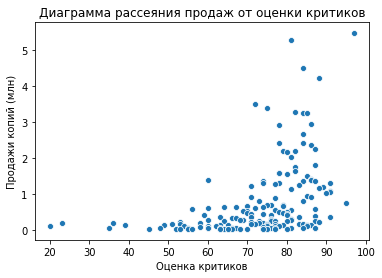

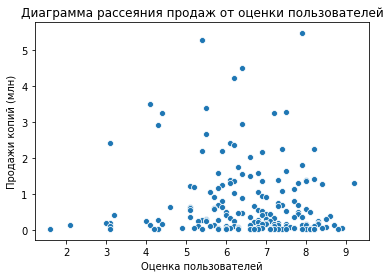

In [36]:
plot_corr_platform(xone)

In [37]:
def corr_plt(df):
    return df.corr()[['critic_score','user_score']].loc['all_sales']

In [38]:
print('ps3\n',corr_plt(ps3))
print('ps4\n', corr_plt(ps4))
print('3ds\n', corr_plt(thrds))
print('xone\n', corr_plt(xone))

ps3
 critic_score    0.432759
user_score      0.128416
Name: all_sales, dtype: float64
ps4
 critic_score    0.406568
user_score     -0.031957
Name: all_sales, dtype: float64
3ds
 critic_score    0.348740
user_score      0.222078
Name: all_sales, dtype: float64
xone
 critic_score    0.416998
user_score     -0.068925
Name: all_sales, dtype: float64


По коэффициенту корреляции можем сделать вывод, что небольшая линейная связь между оценками критиков и продажами есть, связь между оценками пользователей и продажами отсутствует. Диаграмма рассеяния подтверждает наши выводы. Видим, что до 70 быллов оценок критиков число продаж стабильно низкое, от 70 начинается рост.

Оценка пользователей появляется сильно позже релиза игры и никак не влияет на продажи, оценки критиков немного значимее. Покупатели смотрят на оценки критиков, но линейная связь слабая, т.к при низких оценках(ниже 70) мало покупок, оцена выше 80 положительно влияет на решение. При выборе пользователем из нескольких игр оценка критиков окажется решающей.

Посмотрим на распределение игр по жанрам 

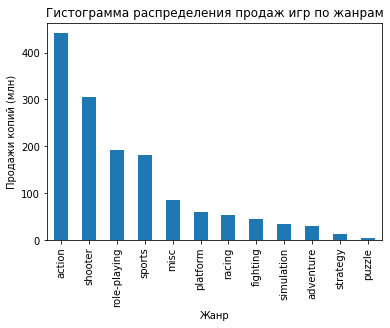

In [39]:
data_actual.groupby('genre').sum().sort_values(
    'all_sales',
    ascending = False)['all_sales'].plot(kind = 'bar')
plt.title('Гистограмма распределения продаж игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи копий (млн)')
plt.show()

#### Вывод
Мы посмотрели число выпущенных игр в разные годы и заметили, что число игр резко росло с 2000 года и с 2012 мы наблюдаем, что чило игр сократилось и остается на одном уровне. Игры стали сложнее, их создают крупные разработчики, поэтому число снизилось. Мы рассмотрели суммарные продажи числа копий на разных платформах по годам и выяснили, что срок жизни платформ примерно равен у всех и составляет около 10 лет. Выделили актуальный период для исследования - данные после 2011 года.

Заметили, что сейчас продажи платформ падают. По продажам лидируют ps2(1233.56 млн),x360(961.24млн), ps3(931.34 млн). Выделили наиболее перспективные платформы. Это ps4 с наибольшим числом продаж за последние годы, высокой медианой, ps3 остается актуальной, она имеет большое число значений в 3 квартиле, платформа 3ds со все еще большим числом продаж за посдение годы.

Исследовали влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. По коэффициенту корреляции сделали вывод, что небольшая линейная связь между оценками критиков и продажами есть, связь между оценками пользователей и продажами отсутствует.

Исследовали продажи игр по жанрам и видим, что жанры action, shooter и role-playing пользуются популярностью, неппулярные жанры adventure, strategy, puzzle.

### Шаг 4. Составьте портрет пользователя каждого региона
<a id = 'portreit'></a>

Определим для пользователей каждого региона
cамые популярные платформы (топ-5)

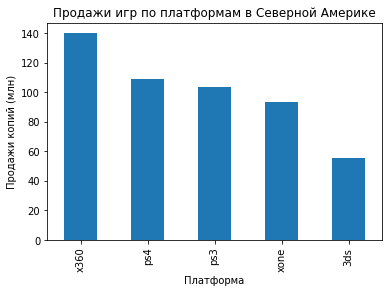

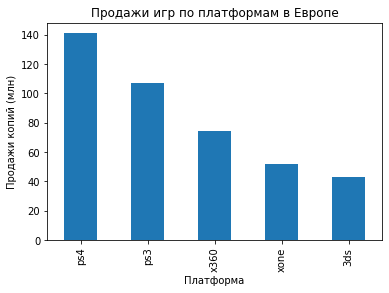

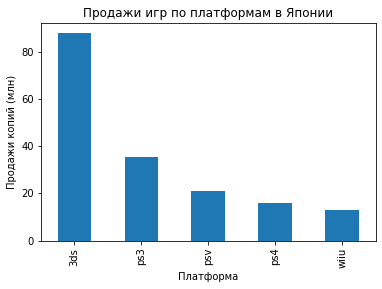

In [40]:
list_region = ['na_sales', 'eu_sales', 'jp_sales']
title = ['Северной Америке', 'Европе', 'Японии']
for i in range(3):
    data_actual.groupby('platform').sum()[list_region[i]].sort_values(ascending = False).head().plot(kind = 'bar')
    plt.title('Продажи игр по платформам в {}'.format(title[i]))
    plt.xlabel('Платформа')
    plt.ylabel('Продажи копий (млн)')
    plt.show()

Самые популярные жанры (топ-5)

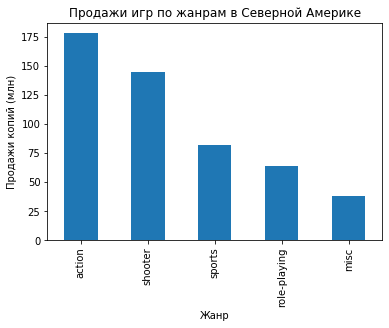

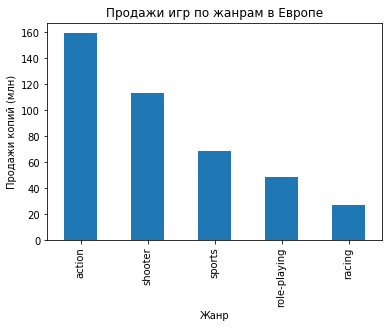

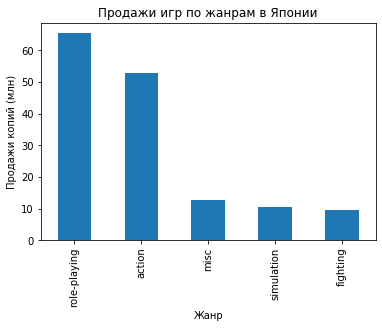

In [41]:
list_region = ['na_sales', 'eu_sales', 'jp_sales']
title = ['Северной Америке', 'Европе', 'Японии']
for i in range(3):
    data_actual.groupby('genre').sum()[list_region[i]].sort_values(ascending = False).head().plot(kind = 'bar')
    plt.title('Продажи игр по жанрам в {}'.format(title[i]))
    plt.xlabel('Жанр')
    plt.ylabel('Продажи копий (млн)')
    plt.show()

Японский рынок сильно отличается от других, как и культура страны отличается от Европейской, широкое распространение в Японии имеют портативные игровые системы, особенно местного производства(3ds компании Nintendo)

Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [42]:
data_esrb = data_actual
data_esrb['rating'] = data_esrb['rating'].fillna('tbd')

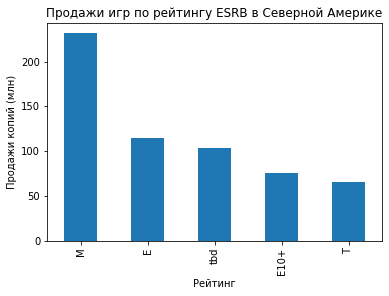

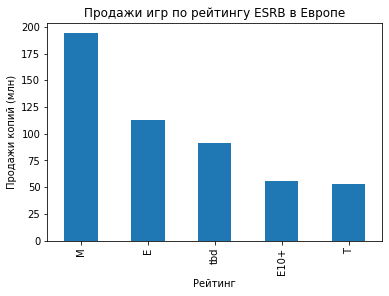

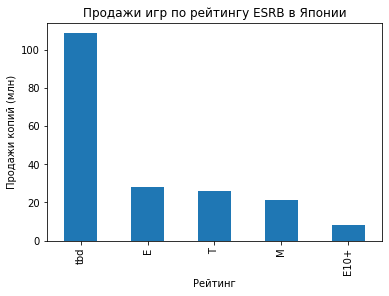

In [43]:
list_region = ['na_sales', 'eu_sales', 'jp_sales']
title = ['Северной Америке', 'Европе', 'Японии']
for i in range(3):
    data_esrb.groupby('rating').sum()[list_region[i]].sort_values(ascending = False).head().plot(kind = 'bar')
    plt.title('Продажи игр по рейтингу ESRB в {}'.format(title[i]))
    plt.xlabel('Рейтинг')
    plt.ylabel('Продажи копий (млн)')
    plt.show()

#### Вывод
В Северной Америке лидирует платформа x360, наиболее продаваемые жанры action и shooter, рейтинг M(для взрослых).
В Европе наибольшее число продаж у платформы ps4 (ps3 на втором месте), предпочтения жанров и рейтингов те же(action, shooter, рейтинг M).  
В Японии видим меньшее число продаж, с большим отрывом лидирует платформа 3ds, наиболее полпулярные жанры role-playing и action. Для Японии производится множество локальных игр, рейтинг для которых не присваивается ESRB, и мы не можем явно определить лидирующие жанры.

### Шаг 5. Проверьте гипотезы
<a id = 'hypotheses'></a>

Проверим гипотезу - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые - H0  
Гипотеза H1 - cредние пользовательские рейтинги платформ Xbox One и PC различается
Проверим гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам применим метод `scipy.stats.ttest_ind()`

In [44]:
data_user = data_actual.query('user_score.notna()')
xbox = data_user.query('platform == "xone"')
pc = data_user.query('platform == "pc"')

In [45]:
disp1 = np.var(xbox['user_score'])
disp2 = np.var(pc['user_score'])
print(disp1, disp2)

1.8965188383045526 2.7569952398906588


Дисперсии выборок отличаются на 1, укажем equal_var = False

In [46]:
results = st.ttest_ind(xbox['user_score'], pc['user_score'], equal_var = False)
print('p-значение: ', results.pvalue)

p-значение:  0.5489537965134912


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Гипотезы сформулированы и проверены верно.

</div>

Проверим гипотезу - средние пользовательские рейтинги жанров Action и Sports равны - H0  
Гипотеза H1 -средние пользовательские рейтинги жанров Action и Sports различны

In [47]:
action = data_user.query('genre == "action"')
sports= data_user.query('genre == "sports"')

In [48]:
disp1 = np.var(action['user_score'])
disp2 = np.var(sports['user_score'])
print(disp1, disp2)

1.8854720340439224 3.0073882971729127


Дисперсии выборок существенно отличаются, укажем equal_var = False

In [49]:
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var = False)
print('p-значение: ', results.pvalue)

p-значение:  4.24307776572644e-20


#### Вывод
Для уровня значимость p = 0.05 гипоеза H0 о равенстве cредних пользовательских рейтингах платформ Xbox One и PC не отвергается.
Гипотеза H0 о равенстве средних пользовательских рейтингов жанров Action и Sports отвергается, принимается альтернативная гипотеза H1 о различиях средних пользовательских рейтингов жанров Action и Sports.

### Шаг 6. Напишите общий вывод
<a id = 'conclusion'></a>

Мы исследовали исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах.  
Изучив общую информацию, выяснили, что в данных присутствуют пропуски. Две строки не содержат жанра и имени, в 269 строках пропущен год релиза. Множество пропусков в столбцах с оценками и рейтингом. Возможно, что некоторые игры еще не оценили критики и пользователи (игра не вышла). Колонки Year_of_Release и Critic_Score имеют неверные типы.

Мы привели столбцы и строковые значения к нижнему регистру для удобства работы с ними. Преобразовали данные в нужные типы. Столбец года релиза и оценки критиков привели к целочисленному типу. Мы заменили значения не определенных рейтингов пользователей на NaN и привели столбец к типу float.  
Мы удалили строки с отсутствующим названием и жанром.  
Мы обработали пропуски года релиза игр. Ошибка похожа на техническую, не выгружены годы релиза у большого числа игр, такие пропуски мы обработали, находим годы релиза у той же игры на других платформах.  
Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.  

Мы изучили число выпущенных игр в разные годы и заметили, что число игр резко росло с 2000 года и с 2012 мы наблюдаем, что чило игр сократилось и остается на одном уровне. Игры стали сложнее, их создают крупные разработчики, поэтому число снизилось. Мы рассмотрели суммарные продажи числа копий на разных платформах по годам и выяснили, что срок жизни платформ примерно равен у всех и составляет около 10 лет. Выделили актуальный период для исследования - данные после 2011 года.

Заметили, что сейчас продажи платформ падают. По продажам лидируют ps2(1233.56 млн),x360(961.24млн), ps3(931.34 млн). Выделили наиболее перспективные платформы. Это ps4 с наибольшим числом продаж за последние годы, высокой медианой, ps3 остается актуальной, она имеет большое число значений в 3 квартиле, платформа 3ds со все еще большим числом продаж за посдение годы.  
Разница в показателях между платформами достигается за счет эксклюзивности игр на платформах. Кроме того, мы можем явно выделить два типа платформ: игровые приставки(ps3, ps4, x360, xone) и портативные игровые системы (3ds, ds, psp, wii, psv, wiiu). Портативные системы становятся не актуальны.  

Исследовали влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. По коэффициенту корреляции сделали вывод, что небольшая линейная связь между оценками критиков и продажами есть, связь между оценками пользователей и продажами отсутствует.  
Исследовали продажи игр по жанрам и видим, что жанры action, shooter и role-playing пользуются популярностью, неппулярные жанры adventure, strategy, puzzle.

Мы составили портрет пользователя каждого региона. В Северной Америке лидирует платформа x360, наиболее продаваемые жанры action и shooter, рейтинг M(для взрослых).
В Европе наибольшее число продаж у платформы ps4 (ps3 на втором месте), предпочтения жанров и рейтингов те же(action, shooter, рейтинг M).  
В Японии видим меньшее число продаж, с большим отрывом лидирует платформа 3ds, наиболее полпулярные жанры role-playing и action. Для Японии производится множество локальных игр, рейтинг для которых не присваивается ESRB, и мы не можем явно определить лидирующие жанры. Японский рынок сильно отличается от других, как и культура страны отличается от Европейской, широкое распространение в Японии имеют портативные игровые системы, особенно местного производства(3ds компании Nintendo)

Мы выдвинули и проверили гипотезы. Для уровня значимость p = 0.05 гипоеза H0 о равенстве cредних пользовательских рейтингах платформ Xbox One и PC не отвергается. Гипотеза H0 о равенстве средних пользовательских рейтингов жанров Action и Sports отвергается, принимается альтернативная гипотеза H1 о различиях средних пользовательских рейтингов жанров Action и Sports.
